In [2]:
# 18 May 2022, Matteo, Ago @ Unimib

# Mettiamo il sensore dentro e fuori dal frigor circa ogni minuto (dentro al suo sacchetto di pluriball): file 
# '20220518_120119.csv'.
# When the sensor is not in the pluriball the file is named '20220518_124021.csv'

# The sensor should not be in the sun, otherwise the SW radiation will keep warming it.

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
filename = '20220518_120119.csv'
df = pd.read_csv(filename,sep=';',skiprows=6)
df

,Time (UTC),SKH1_70727633.pr,SKH1_70727633.bat,SKH1_70727633.temp,SKH1_70727633.rh
0,12:01:19.170,100377,7.183,26.71,54.15
1,12:01:19.984,100376,7.192,26.78,54.23
2,12:01:20.984,100378,7.215,26.82,54.17
3,12:01:21.984,100374,7.133,26.84,54.12
4,12:01:22.984,100374,7.161,26.89,54.02
...,...,...,...,...,...
672,12:12:32.382,100360,6.975,26.08,55.15
673,12:12:33.383,100361,6.924,26.15,54.61
674,12:12:34.382,100361,6.953,26.27,54.60
675,12:12:35.382,100358,6.998,26.37,55.07


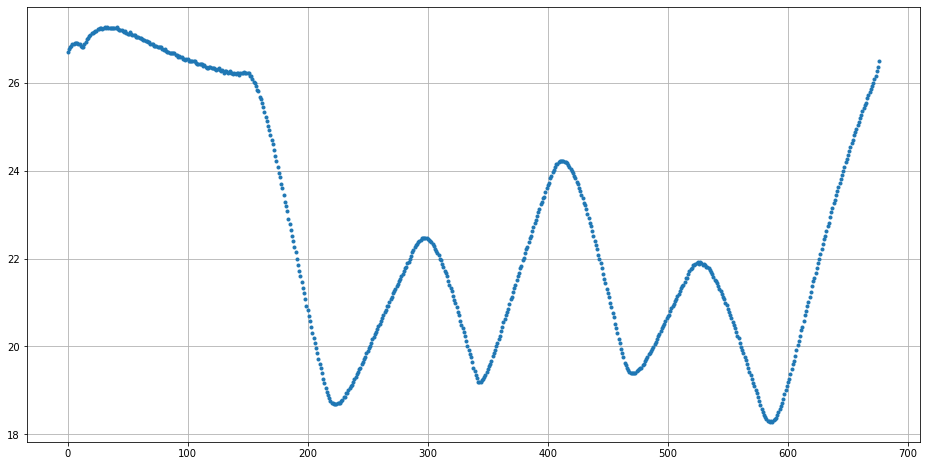

In [16]:
temp = df[' SKH1_70727633.temp']
time = df['Time (UTC)']

plt.figure(figsize=(16,8))
#plt.plot(df['Time (UTC)'],df[' SKH1_70727633.temp'],'.')
plt.plot(temp,'.')
plt.grid()

-0.11600000000000002


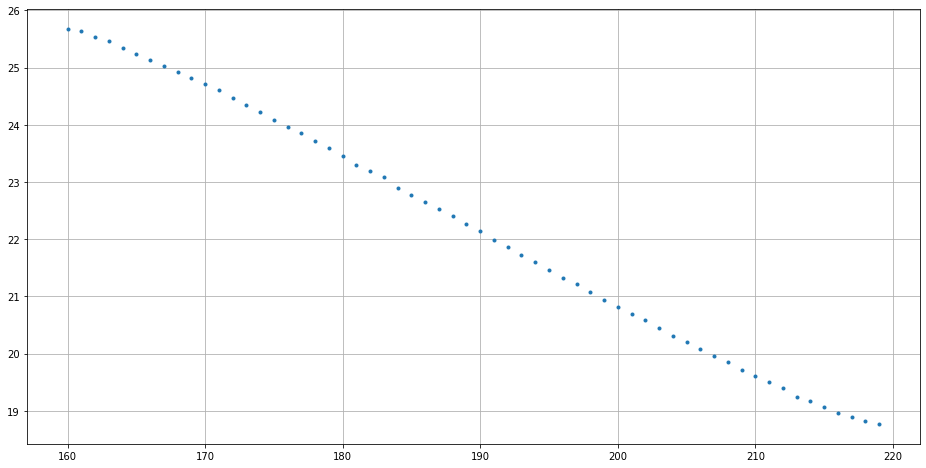

In [22]:
plt.figure(figsize=(16,8))
#plt.plot(df['Time (UTC)'],df[' SKH1_70727633.temp'],'.')
plt.plot(temp[160:220],'.')
plt.grid()

slope = (temp[220]-temp[160])/(220-160)
print(slope)

0.05749999999999999


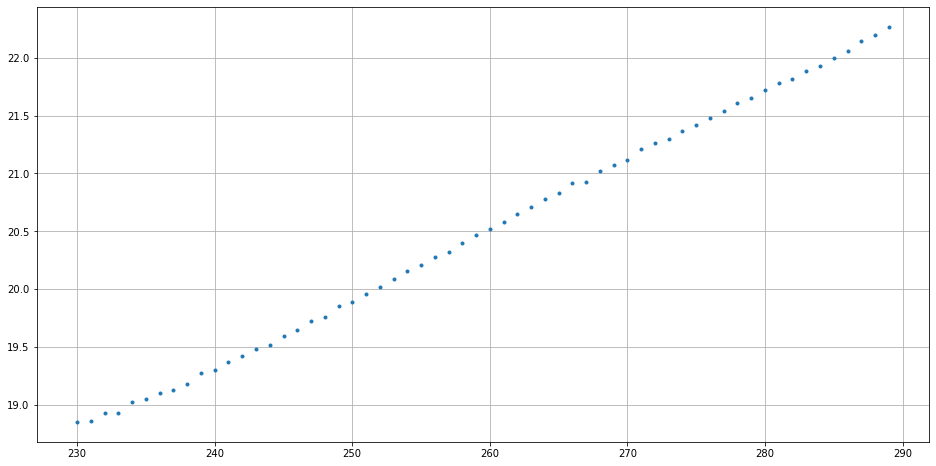

In [25]:
plt.figure(figsize=(16,8))
#plt.plot(df['Time (UTC)'],df[' SKH1_70727633.temp'],'.')
plt.plot(temp[230:290],'.')
plt.grid()

slope = (temp[290]-temp[230])/(290-230)
print(slope)

0.09437500000000001


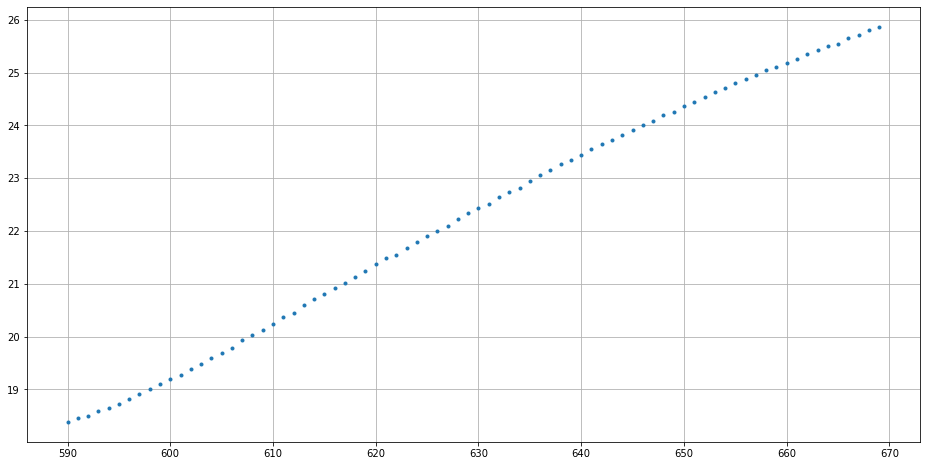

In [29]:
plt.figure(figsize=(16,8))
#plt.plot(df['Time (UTC)'],df[' SKH1_70727633.temp'],'.')
plt.plot(temp[590:670],'.')
plt.grid()

slope = (temp[670]-temp[590])/(670-590)
print(slope)

In [81]:
filename = '20220518_124021.csv'
df = pd.read_csv(filename,sep=';',skiprows=6)
df

,Time (UTC),SKH1_70727633.pr,SKH1_70727633.bat,SKH1_70727633.temp,SKH1_70727633.rh
0,12:40:21.721,100376,8.190,25.81,52.46
1,12:40:21.984,100379,8.174,25.80,52.76
2,12:40:22.984,100377,8.178,25.80,53.00
3,12:40:23.984,100376,8.137,25.80,53.07
4,12:40:24.984,100374,8.189,25.78,53.02
...,...,...,...,...,...
2183,13:16:43.718,100375,8.069,26.79,50.40
2184,13:16:44.740,100377,8.104,26.81,50.60
2185,13:16:45.740,100376,8.123,26.84,50.82
2186,13:16:46.740,100375,8.120,26.84,51.09


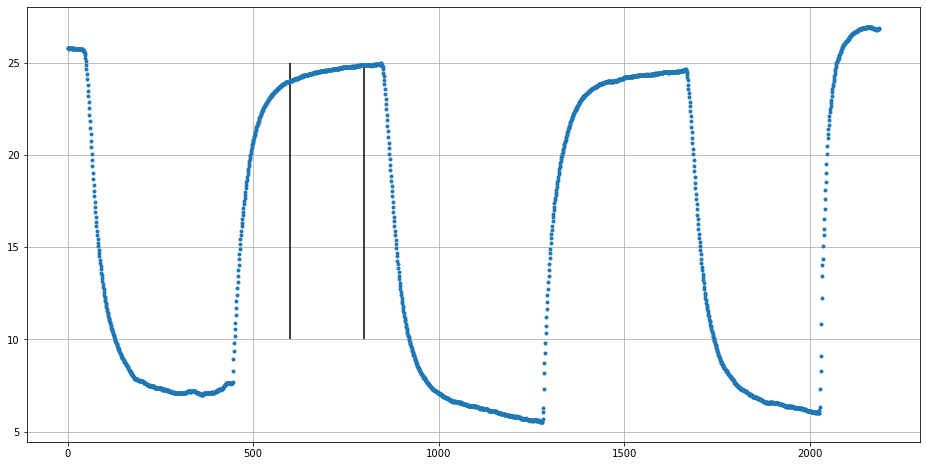

In [84]:
temp = df[' SKH1_70727633.temp']
time = df['Time (UTC)']

plt.figure(figsize=(16,8))
#plt.plot(df['Time (UTC)'],df[' SKH1_70727633.temp'],'.')
plt.plot(temp,'.')
#plt.yscale('log')
plt.grid()

plt.vlines(600,10,25)
plt.vlines(800,10,25)
# The shape is not an exponential.
# The sensor has been put in and out of the fridge, again, letting it measure for longer intervals.
# We see that the slope changes in time and this is related to the time variation of the sensible heat flux, that
# depends on the sensor-ambient temperature difference.

In [69]:
time = df['Time (UTC)'].values
tempo = pd.to_datetime(time)
seconds = (tempo-tempo[0]).seconds # seconds from the beginning

print(time[0])
print(time[-1])

12:40:21.721
13:16:47.741


In [65]:
2186/60

36.43333333333333

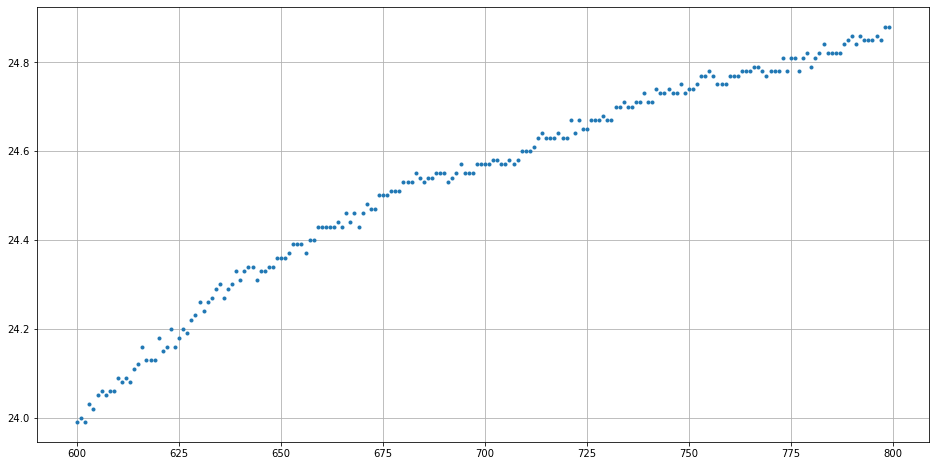

In [86]:
plt.figure(figsize=(16,8))
i0 = 600
i1 = 800
plt.plot(temp[i0:i1],'.')
plt.grid()

# 1 grado in 200 secondi circa 3 minuti.

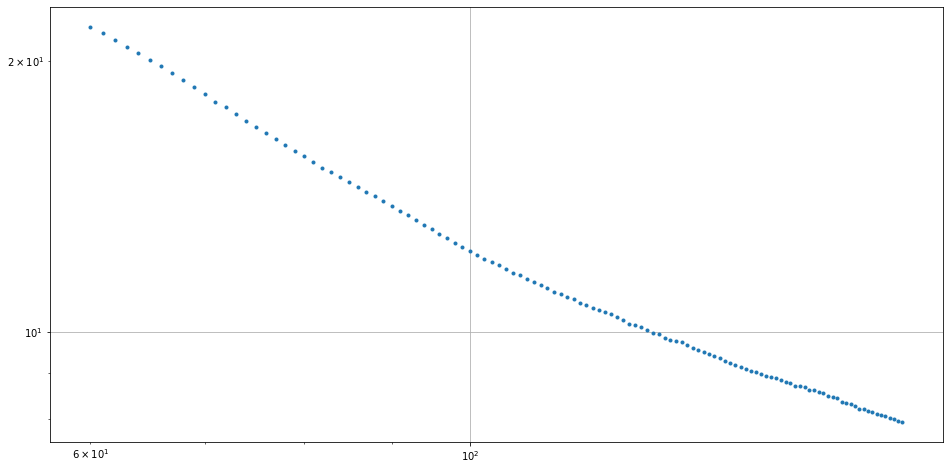

In [74]:
plt.figure(figsize=(16,8))
i0 = 60
i1 = 180
plt.plot(temp[i0:i1],'.')
plt.yscale('log')
plt.xscale('log')
plt.grid()

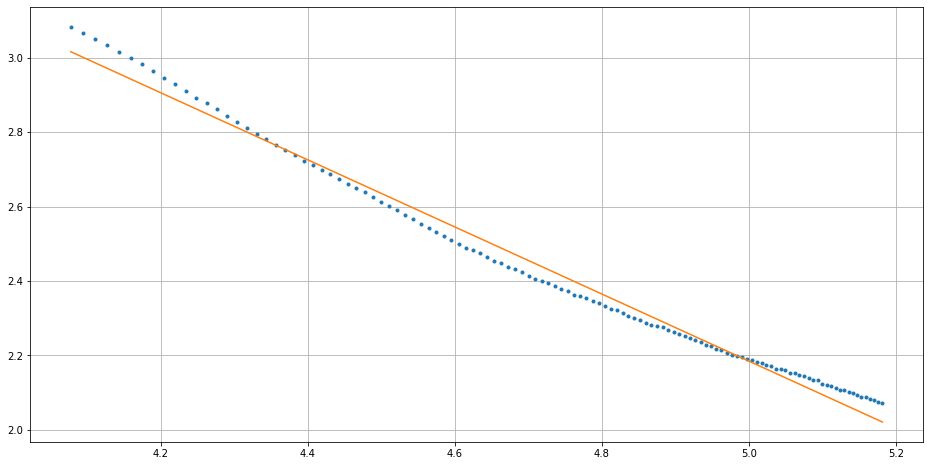

In [81]:
x = np.log(seconds[i0:i1])
y = np.log(temp[i0:i1])
from scipy.stats import linregress as lr

slope, intercept, r, p, se = lr(x, y)

plt.figure(figsize=(16,8))
plt.plot(x,y,'.')
plt.plot(x,x*slope+intercept)
plt.grid()

In [64]:
# Here I also use the Trisonica wind sensor, so that we can compare the temperature measurements.
# I keep the sensor in the room (and in the shade) for a minute or so, then I put it outside (I expect some wind),
# in the sun, and then back again in and out.

filename = '20220606_073358.csv'
df = pd.read_csv(filename,sep=';',skiprows=9,usecols=[0,5,6,10,11,12])
df

,Time (UTC),C.wspd,C.wdir,C.temp,C.rh,C.pr
0,07:33:58.621,0.16,3,23.18,63.2,100059
1,07:33:58.747,0.17,5,23.19,63.2,100058
2,07:33:58.941,0.20,6,23.20,63.2,100058
3,07:33:59.141,0.19,7,23.18,63.3,100058
4,07:33:59.341,0.18,357,23.13,63.5,100058
...,...,...,...,...,...,...
1083,07:37:37.022,0.22,258,22.98,73.7,100054
1084,07:37:37.222,0.29,291,22.76,75.0,100054
1085,07:37:37.427,0.41,266,22.45,76.3,100057
1086,07:37:37.622,0.34,288,22.28,77.2,100056


In [71]:
df_skh1 = pd.read_csv(filename,sep=';',skiprows=9,usecols=[0,1,2,3,4],na_values=' ')#skip_blank_lines=True)
#df_skh1.replace('', np.nan, inplace=True)
#df_skh1.dropna(inplace=True)

#df_skh1[df_skh1[' SKH1_70727633.temp'].astype(bool)]   
df_skh1#[' SKH1_70727633.temp']

,Time (UTC),SKH1_70727633.pr,SKH1_70727633.bat,SKH1_70727633.temp,SKH1_70727633.rh
0,07:33:58.621,99898.0,8.089,26.49,46.05
1,07:33:58.747,NaN,NaN,NaN,NaN
2,07:33:58.941,99897.0,8.143,26.47,46.23
3,07:33:59.141,NaN,NaN,NaN,NaN
4,07:33:59.341,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1083,07:37:37.022,NaN,NaN,NaN,NaN
1084,07:37:37.222,NaN,NaN,NaN,NaN
1085,07:37:37.427,NaN,NaN,NaN,NaN
1086,07:37:37.622,NaN,NaN,NaN,NaN


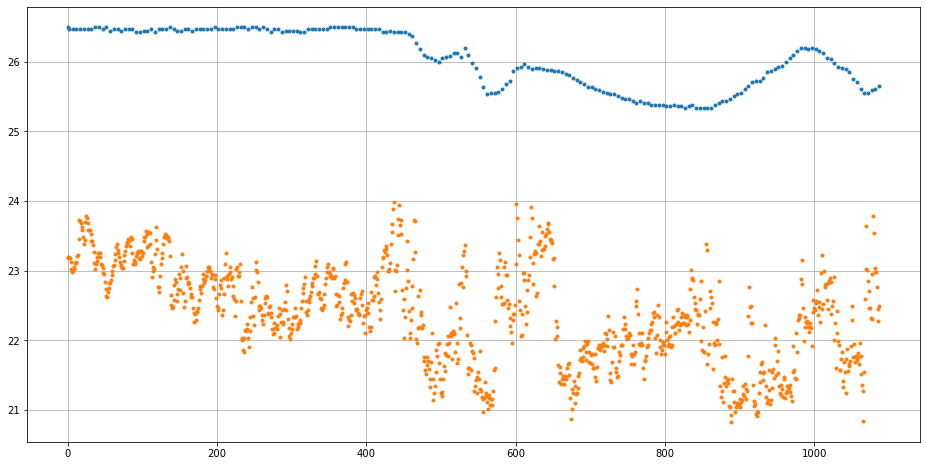

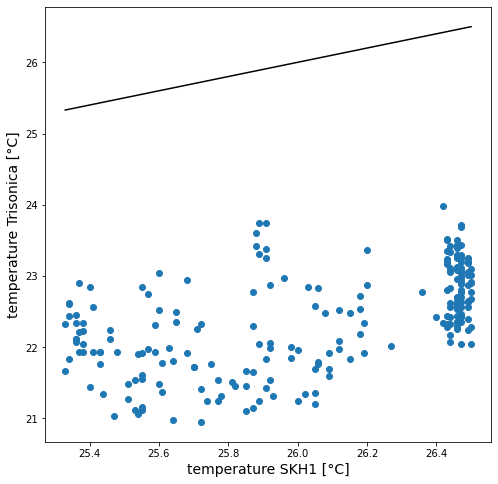

In [79]:
temp = df_skh1[' SKH1_70727633.temp']
time = df_skh1['Time (UTC)']
temp_tris = df[' C.temp']
time_tris = df['Time (UTC)']

plt.figure(figsize=(16,8))
plt.plot(temp,'.')
plt.plot(temp_tris,'.')
plt.grid()

plt.figure(figsize=(8,8))
plt.scatter(temp,temp_tris)
plt.xlabel('temperature SKH1 [°C]',fontsize=14)
plt.ylabel('temperature Trisonica [°C]',fontsize=14)
plt.plot([np.min(temp), np.max(temp)],[np.min(temp), np.max(temp)],'k')

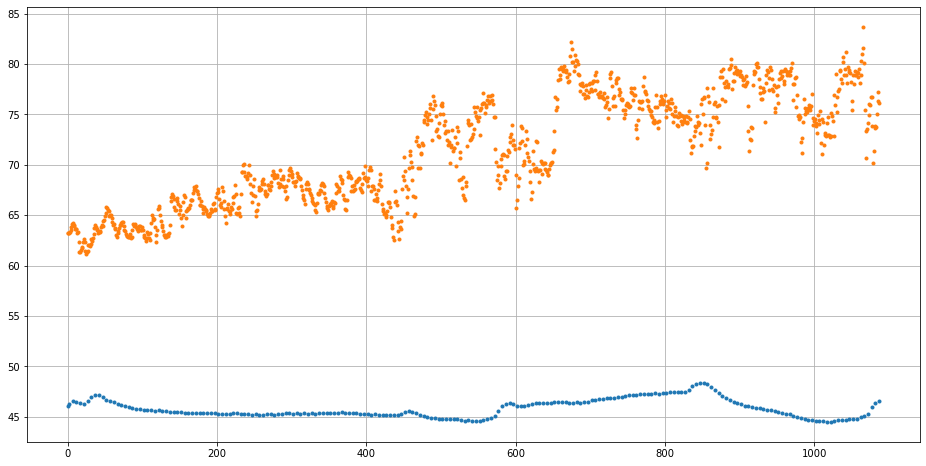

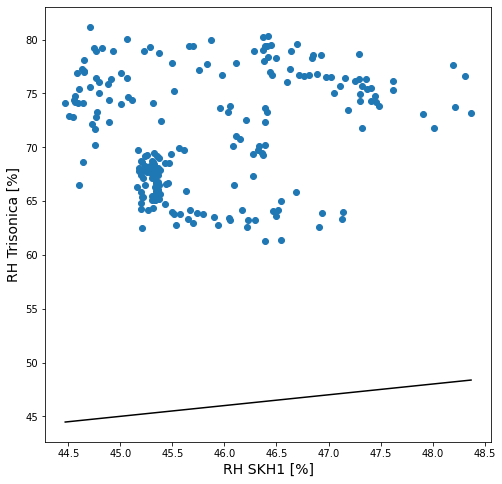

In [80]:
rh = df_skh1[' SKH1_70727633.rh']
rh_tris = df[' C.rh']

plt.figure(figsize=(16,8))
plt.plot(rh,'.')
plt.plot(rh_tris,'.')
plt.grid()

plt.figure(figsize=(8,8))
plt.scatter(rh,rh_tris)
plt.xlabel('RH SKH1 [%]',fontsize=14)
plt.ylabel('RH Trisonica [%]',fontsize=14)
plt.plot([np.min(rh), np.max(rh)],[np.min(rh), np.max(rh)],'k')

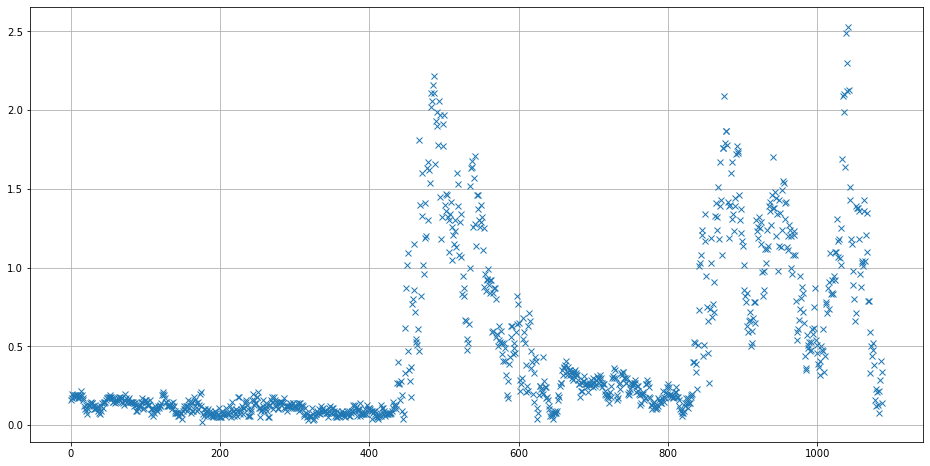

In [17]:
plt.figure(figsize=(16,8))
wspd = df[' C.wspd']
plt.plot(wspd,'x') # Trisonica
plt.grid()